Importing necessary libraries :

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML 202/TEAM 4/Unsupervised Clustering/data.csv')

**Studying** **the** **Dataset**

In [4]:
df.shape

(98000, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

In [6]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [7]:
df.columns

Index(['id', 'f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07',
       'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16',
       'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25',
       'f_26', 'f_27', 'f_28'],
      dtype='object')

In [8]:
#Finding the null values 
df.isnull().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [9]:
#Number of null values in all columns
df.isnull().sum().sum()

0

In [10]:
#Duplicates in the dataset
df.duplicated().sum()

0

In [11]:
df.isna().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

In [12]:
#Removing the first column
X = df.loc[ : , df.columns != 'id']

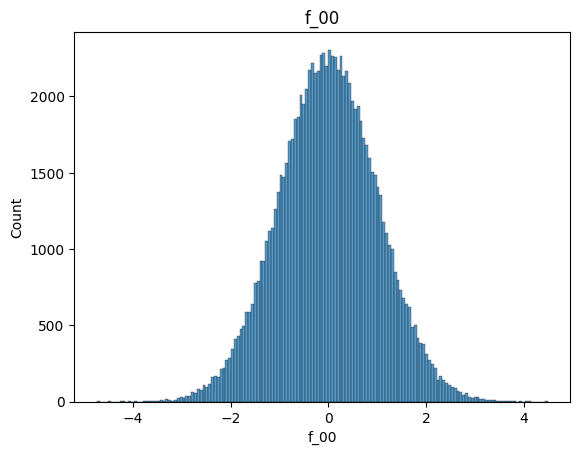

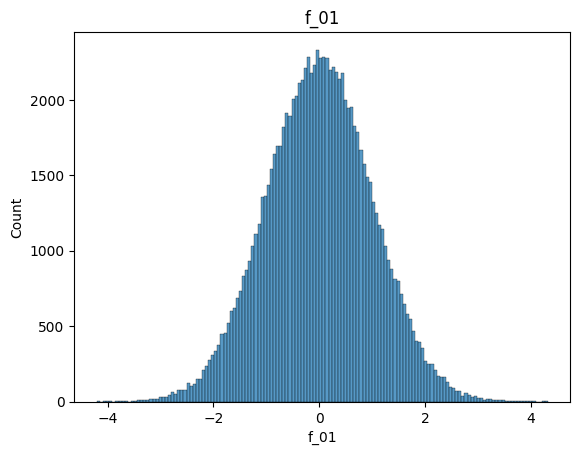

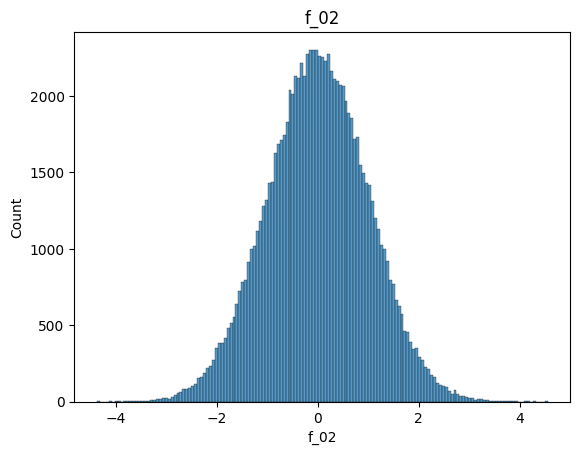

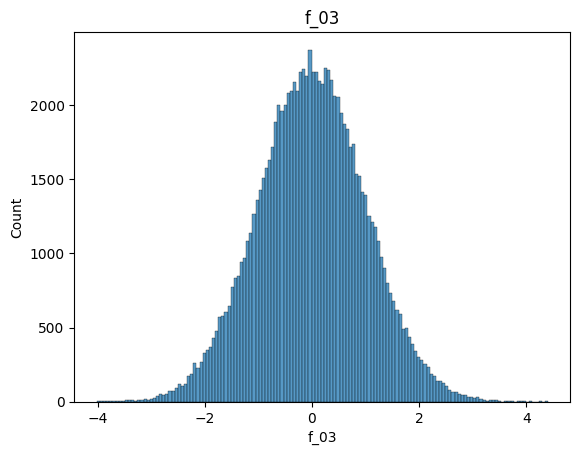

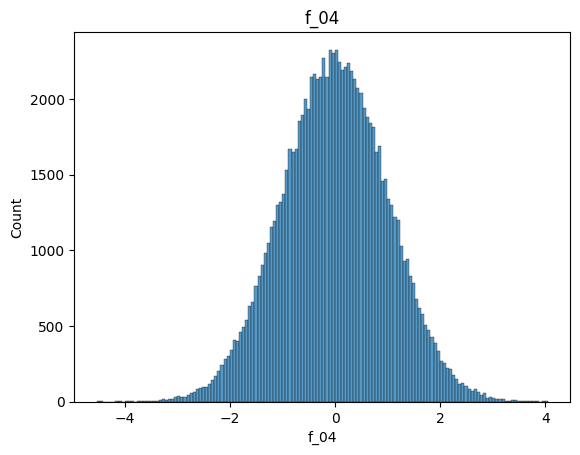

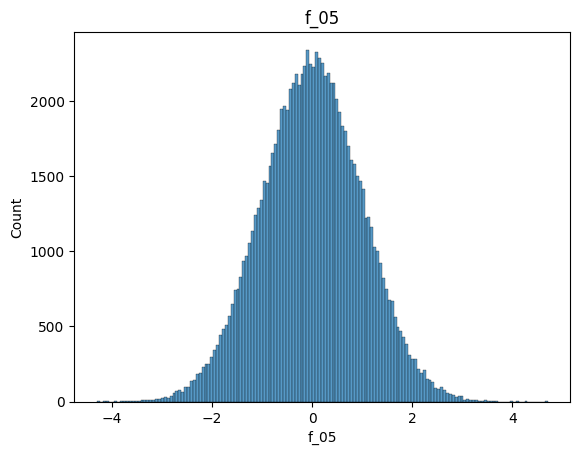

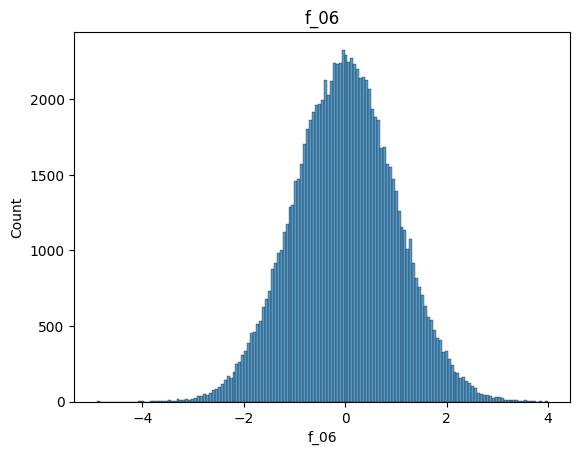

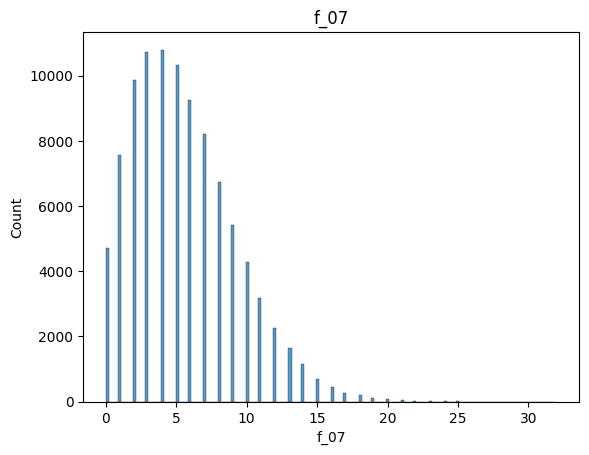

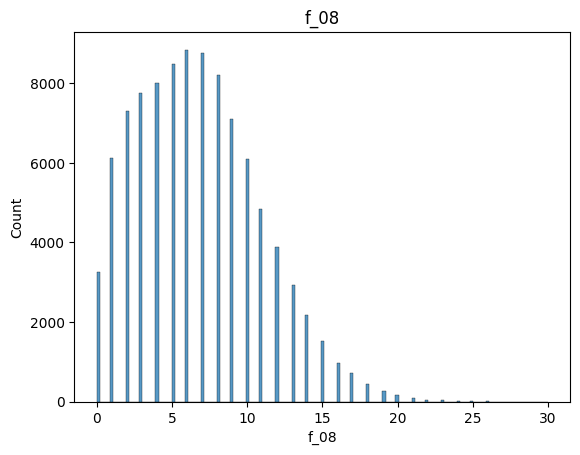

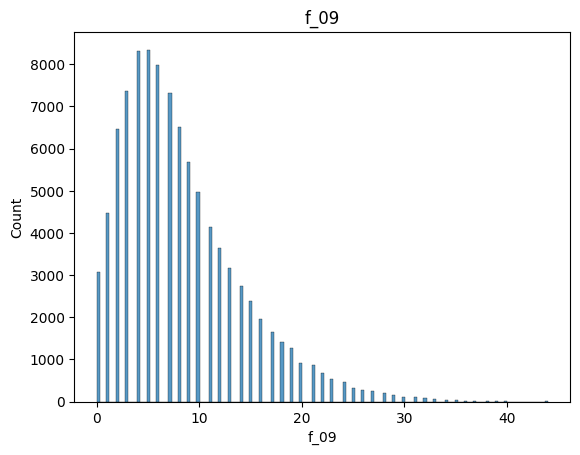

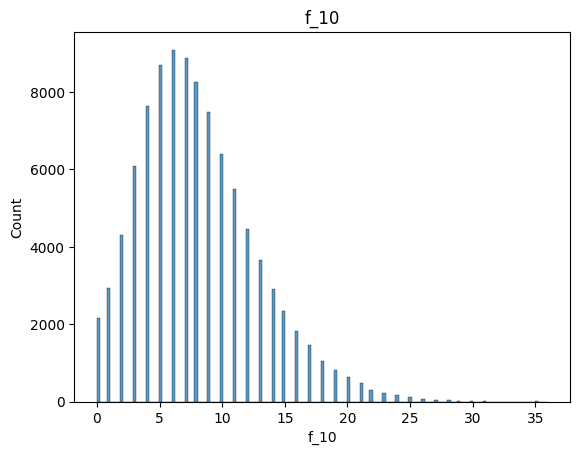

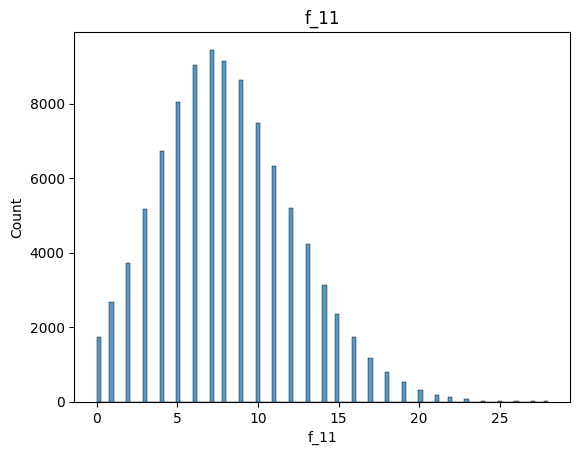

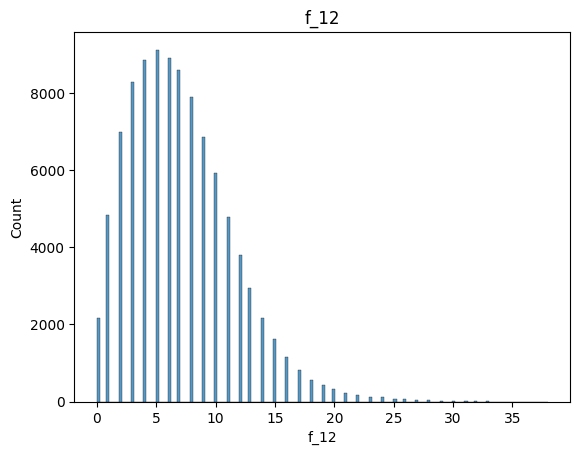

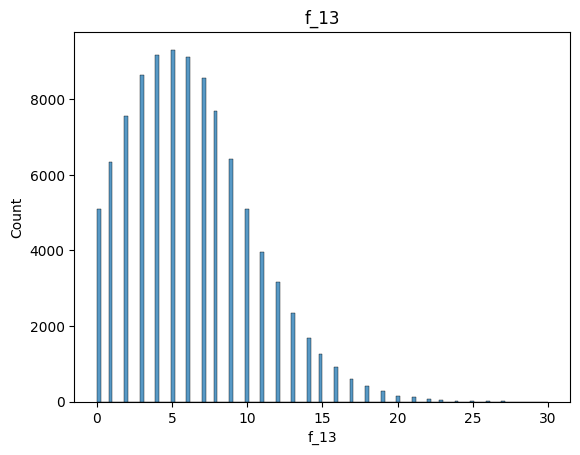

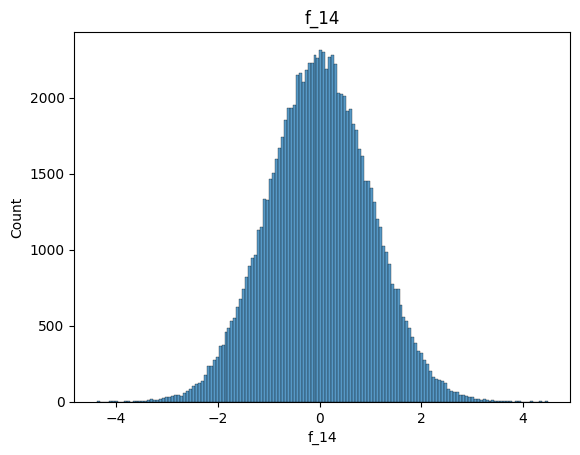

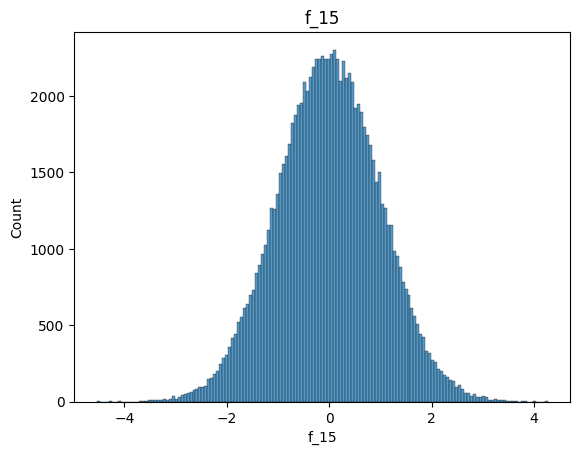

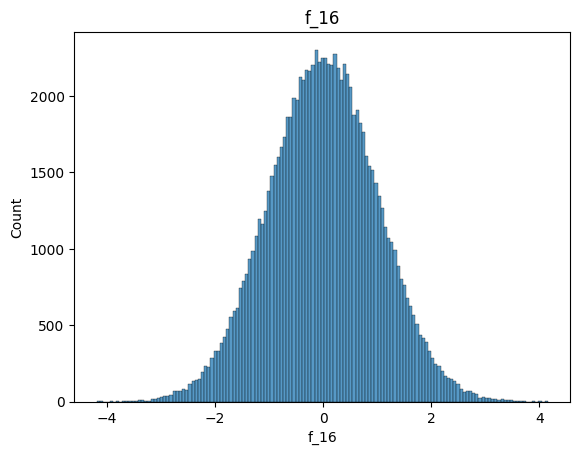

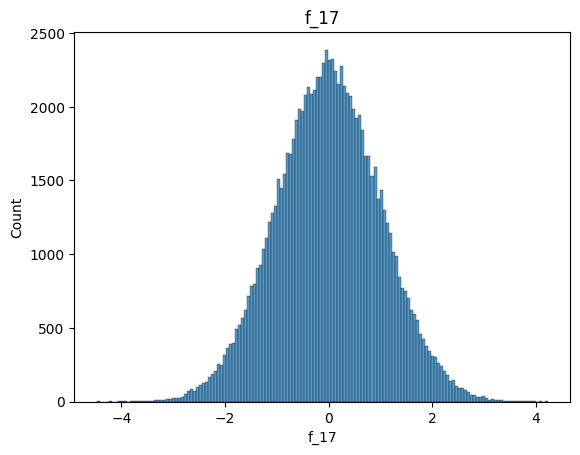

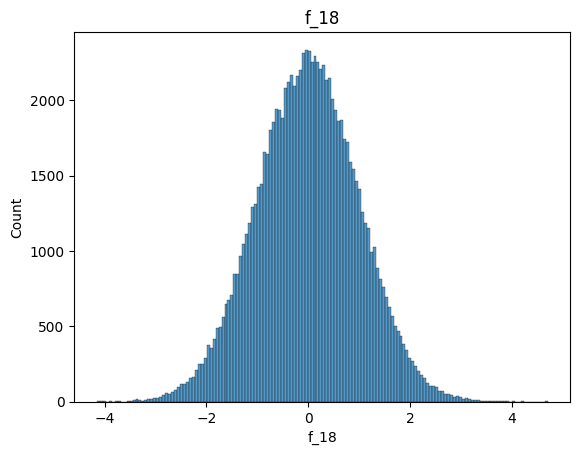

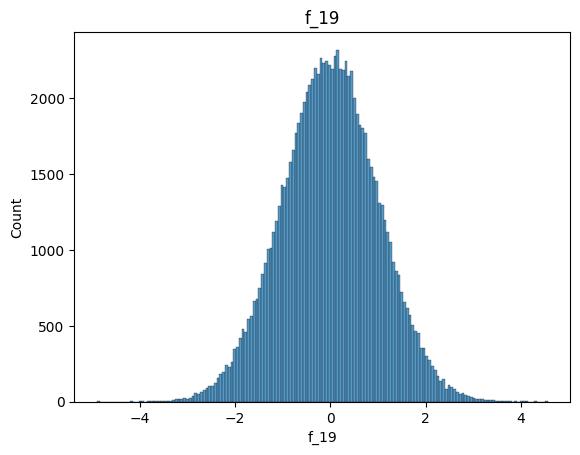

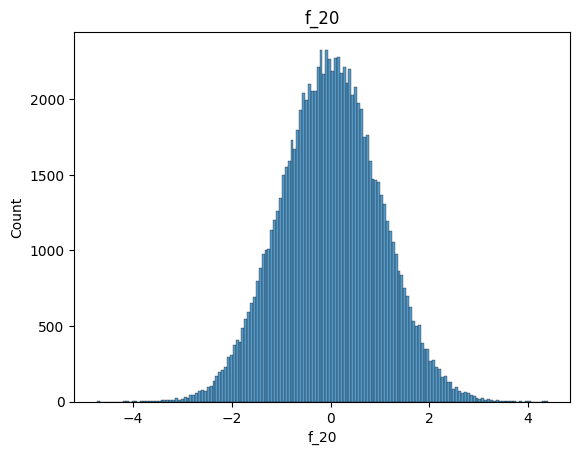

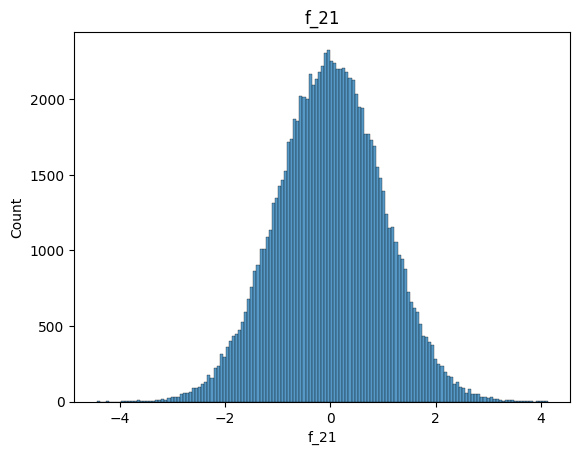

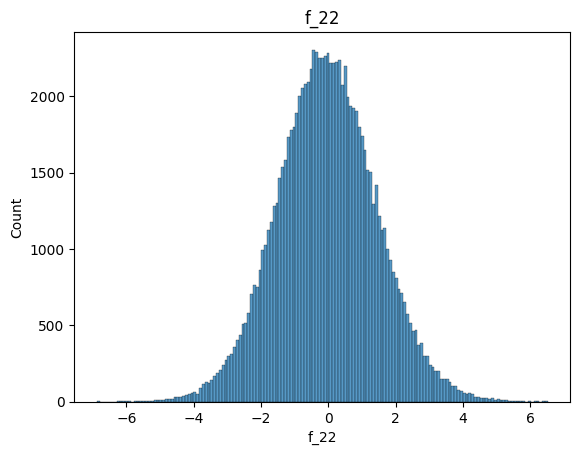

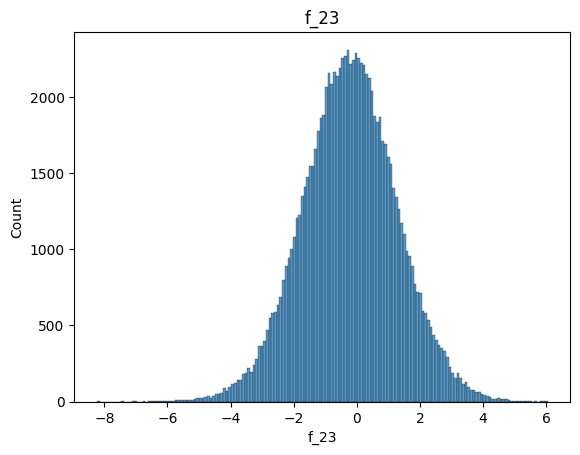

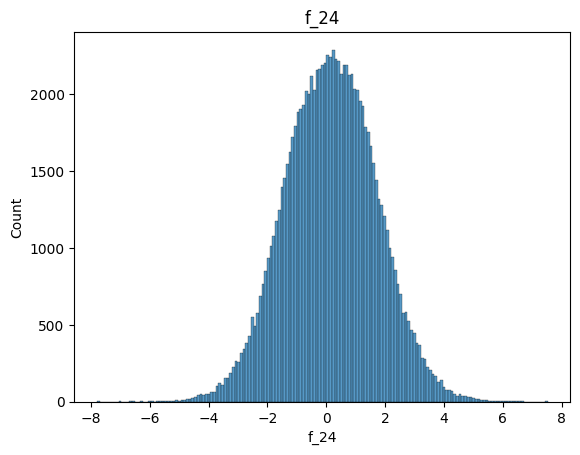

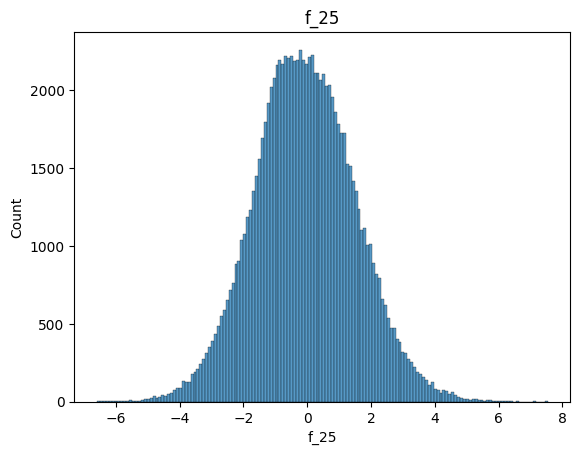

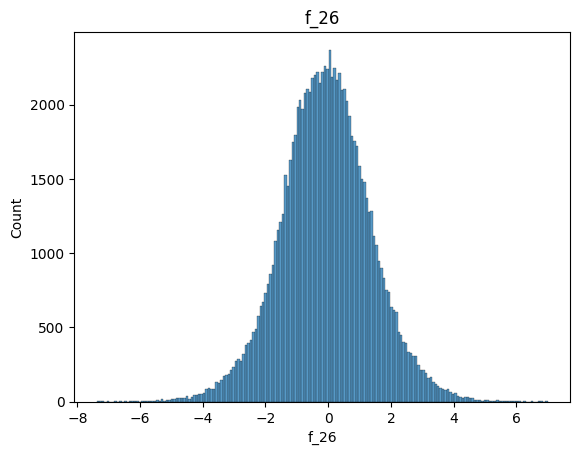

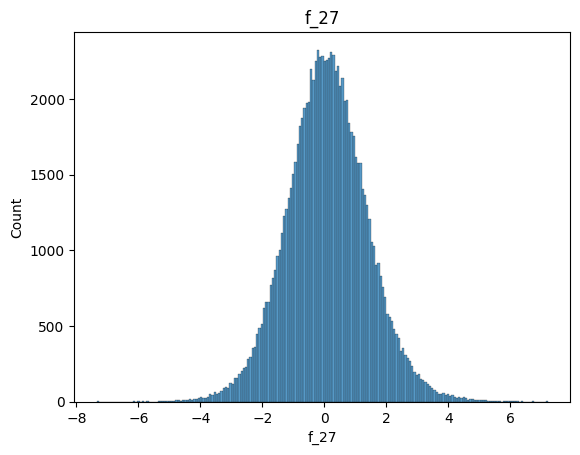

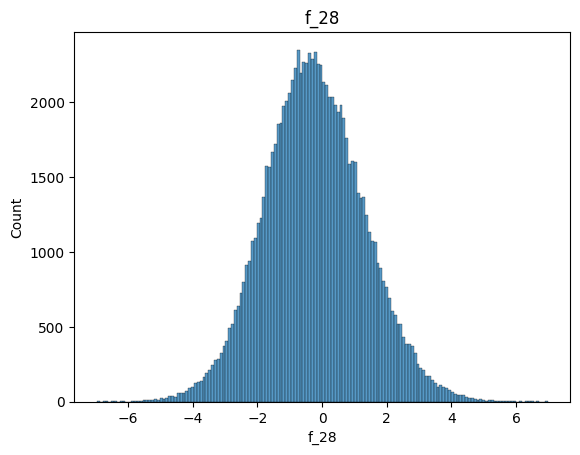

In [13]:
for col in X.columns:
  sns.histplot(df[col])
  plt.title(col)
  plt.show()

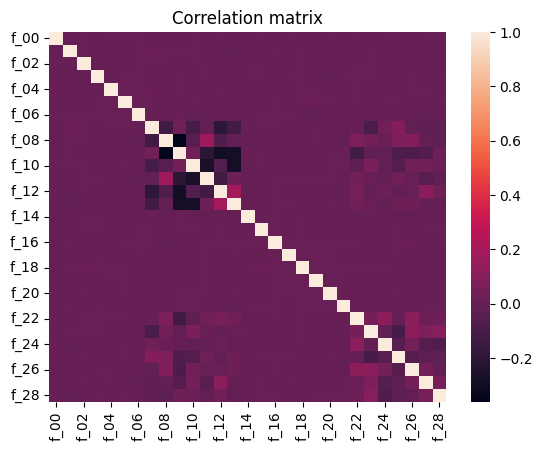

In [14]:
sns.heatmap(X.corr())
plt.title('Correlation matrix')
plt.show()

Finding the categorical columns 

In [15]:
cat = X.select_dtypes(include=['object']).copy()
cat.columns

Index([], dtype='object')

In [16]:
print(X.shape)

(98000, 29)


Implementation of **Elbow** Method

In [17]:
wcss = []
for k in range(1, 30):
    kmeans = MiniBatchKMeans(n_clusters = k, init='k-means++', max_iter=100, batch_size=100, verbose=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: Futur

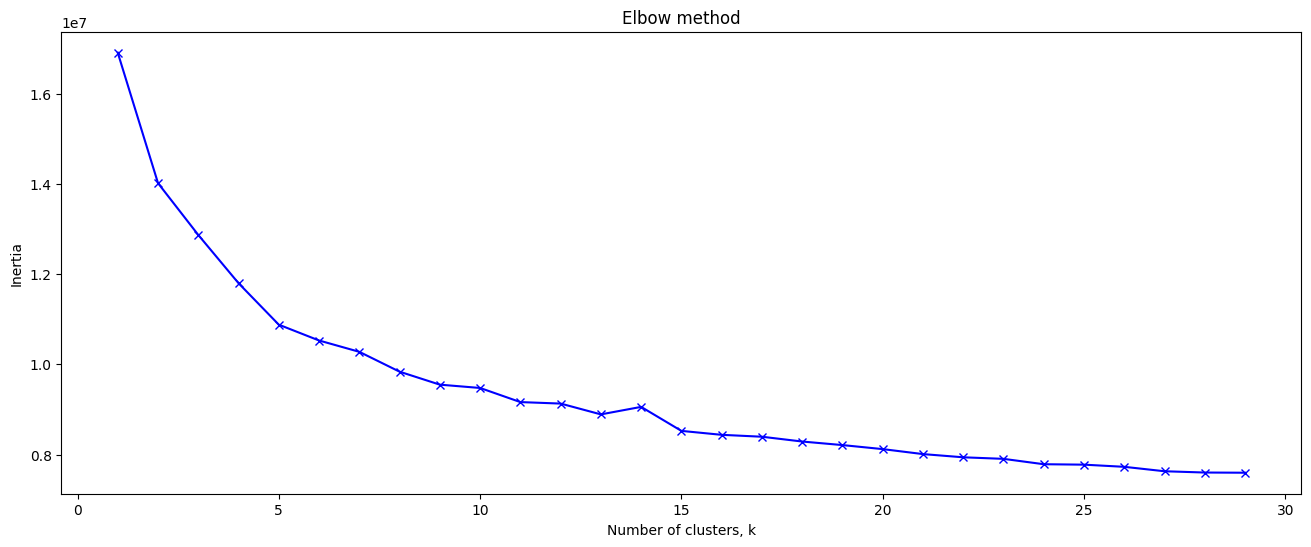

In [18]:
plt.figure(figsize=(16,6))
plt.plot(range(1,30), wcss, 'bx-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [19]:
n_clusters = 7

In [20]:
# Creating an object for MiniBatchKmeans
mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, max_iter=100, verbose=0)

In [21]:
#Fitting the data into the mbk object
mbk.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(batch_size=1000, n_clusters=7)

In [22]:
# Determining the labels for each data point
labels = mbk.labels_

In [23]:
# Determining the centroids of the clusters
centroids = mbk.cluster_centers_

In [24]:
print(labels)

[2 6 2 ... 4 1 2]


In [25]:
print(centroids)

[[ 3.82172556e-03  1.55965286e-02 -2.03871605e-02 -1.82639511e-02
  -9.18077571e-03 -4.23574953e-03  2.86789700e-03  3.82331625e+00
   6.22042760e+00  6.00414143e+00  4.03344205e+00  9.15903091e+00
   9.12662422e+00  1.22688823e+01  1.47505265e-02 -4.23520284e-03
  -2.57881688e-03  3.24403026e-03  7.79502329e-04 -9.51132244e-03
   1.59752550e-02 -2.14900084e-02  7.37233673e-02 -2.15590708e-01
   1.59167615e-01 -6.31269365e-02 -6.42281885e-02  1.19252694e-01
  -2.44765208e-01]
 [-1.32867715e-02  6.91043395e-03  1.38909492e-03  2.79195336e-04
  -2.35042971e-03  1.70693502e-02 -5.51529919e-03  6.11776219e+00
   4.37163595e+00  5.71480998e+00  1.53029685e+01  5.40621432e+00
   7.20021204e+00  6.03180558e+00 -7.07081760e-03 -5.02629470e-03
   1.23896398e-02 -6.42506227e-03  7.01253942e-03 -1.18939959e-02
  -1.98324412e-02 -5.85949785e-03 -3.42099675e-02 -6.00236758e-02
   1.33609190e-01 -1.62514860e-01  9.15691681e-02  2.50590267e-01
  -2.13421178e-01]
 [-1.31195438e-03  8.11450710e-03  2.9

Retrieving the Predicted data :

In [26]:
data = {'id' : list(range(len(labels))),
        'Predicted' : labels}
df_labels = pd.DataFrame(data)

In [27]:
df_labels.to_csv('cluster_labels.csv',index = False)

Implementation of **Silhouette** method

In [ ]:
range_n_clusters = range(2,29)
silhouette_avg = []
for k in range_n_clusters:
    kmeans = MiniBatchKMeans(n_clusters = k,init='k-means++', batch_size = 1000, max_iter = 100, verbose = 0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))


"range_n_clusters = range(2,29)\nsilhouette_avg = []\nfor k in range_n_clusters:\n    kmeans = MiniBatchKMeans(n_clusters = k,init='k-means++', batch_size = 1000, max_iter = 100, verbose = 0)\n    kmeans.fit(X)\n    cluster_labels = kmeans.labels_\n    silhouette_avg.append(silhouette_score(X, cluster_labels))"

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

"plt.plot(range_n_clusters,silhouette_avg,'bx-')\nplt.xlabel('Values of K') \nplt.ylabel('Silhouette score') \nplt.title('Silhouette analysis For Optimal k')\nplt.show()"

In [ ]:
n_clusters = 3

'n_clusters = 3'

In [ ]:
# Creating an object for MiniBatchKmeans
mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, max_iter=1000, verbose=0)

'mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=1000, max_iter=1000, verbose=0)'

In [ ]:
#Fitting the data into the mbk object
mbk.fit(X)

'mbk.fit(X)'

In [ ]:
# Determining the labels for each data point
labels = mbk.labels_

'labels = mbk.labels_'

In [ ]:
# Determining the centroids of the clusters
centroids = mbk.cluster_centers_

'centroids = mbk.cluster_centers_'

In [ ]:
print(labels)

'print(labels)'

In [ ]:
print(centroids)

'print(centroids)'

In [ ]:
data = {'id' : list(range(len(labels))),
        'Predicted' : labels}
df_labels = pd.DataFrame(data)

In [ ]:
df_labels.to_excel('cluster_labels_1.xlsx',index = False)

In [ ]:
model = KMeans(n_clusters = n_clusters)
model.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
silhouette_scores = silhouette_score(X,model.labels_)

In [ ]:
average_silhoutte_score = np.mean(silhouette_scores)
print(average_silhoutte_score)

0.10841891348847682


**Visualization**

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
print(principalComponents.shape)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

(98000, 2)


,principal component 1,principal component 2
0,1.556158,-5.557619
1,-4.568477,0.739473
2,-4.351624,-1.553512
3,6.138703,-1.486701
4,-5.003508,0.168324


In [30]:
import sklearn.cluster as cluster 
kmeans = cluster.KMeans(n_clusters=7)
kmeans = kmeans.fit(pca_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

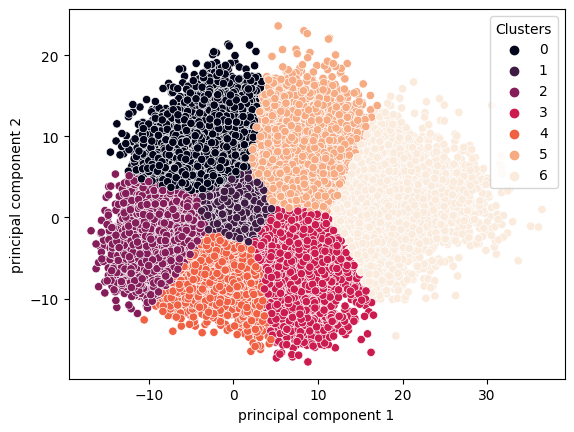

In [31]:
pca_df['Clusters'] = kmeans.labels_
sns.scatterplot(x = "principal component 1", y = "principal component 2", hue = 'Clusters' , data = pca_df,palette = sns.color_palette("rocket", as_cmap=True))


**Deployment using Gradio**

In [32]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 

In [33]:
import gradio as gr

In [34]:
res = pd.read_csv('/content/cluster_labels.csv')

In [35]:
def predict_res(id):
  id = int(id)
  return "Cluster  "+str(res.iloc[id][1])

In [36]:
print(str(res.iloc[0][1]))

2


In [37]:
outputs = gr.outputs.Textbox()

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [38]:
gr.Interface(predict_res, inputs="number", outputs=outputs).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>